# NLP Market Sentiment Analysis
We examine sentiment in News Headlines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
plt.style.use('seaborn')

import seaborn as sn
%matplotlib inline

## Loading the Data
The purpose of this is to load all the emails into a program that counts the word frequency for all of the words across all of the emails in the training set. 

Make sure you unzip the data file

In [2]:
datafile = './data/million-headlines/abcnews-date-text.csv'

In [3]:
headline_df = pd.read_csv(datafile, parse_dates=[0],infer_datetime_format=True)

In [4]:
headline_df.shape

(1103663, 2)

In [5]:
headline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103663 entries, 0 to 1103662
Data columns (total 2 columns):
publish_date     1103663 non-null datetime64[ns]
headline_text    1103663 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 16.8+ MB


In [6]:
headline_df.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [7]:
re_headline_df = headline_df['headline_text']

In [8]:
re_headline_df.index = headline_df['publish_date']

In [9]:
re_headline_df

publish_date
2003-02-19    aba decides against community broadcasting lic...
2003-02-19       act fire witnesses must be aware of defamation
2003-02-19       a g calls for infrastructure protection summit
2003-02-19             air nz staff in aust strike for pay rise
2003-02-19        air nz strike to affect australian travellers
2003-02-19                    ambitious olsson wins triple jump
2003-02-19           antic delighted with record breaking barca
2003-02-19    aussie qualifier stosur wastes four memphis match
2003-02-19         aust addresses un security council over iraq
2003-02-19           australia is locked into war timetable opp
2003-02-19    australia to contribute 10 million in aid to iraq
2003-02-19    barca take record as robson celebrates birthda...
2003-02-19                           bathhouse plans move ahead
2003-02-19        big hopes for launceston cycling championship
2003-02-19               big plan to boost paroo water supplies
2003-02-19               bl

## Sentiment Analysis

In [10]:
# Run - pip install TextBlob from a cmd
from textblob import TextBlob

In [11]:
positive_sentence = "I love EDHEC. Best Masters of Finance school!"
neutral_sentence = "The sky is often blue except when there are clouds"
negative_sentence = "I hate it when they give us a classroom without windows."

In [12]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [13]:
print("Analysis of positive sentence: ", positive_blob.sentiment)
print("Analysis of neutral sentence: ", neutral_blob.sentiment)
print("Analysis of negative sentence: ", negative_blob.sentiment)

Analysis of positive sentence:  Sentiment(polarity=0.75, subjectivity=0.44999999999999996)
Analysis of neutral sentence:  Sentiment(polarity=0.0, subjectivity=0.1)
Analysis of negative sentence:  Sentiment(polarity=-0.8, subjectivity=0.9)


## Historical Analysis of Headlines

In [14]:
# This can be quite slow ~30 seconds
blobs = [TextBlob(re_headline_df[i]) for i in range(re_headline_df.shape[0])]

In [15]:
# DO NOT set this to TRUE unless you are sure

notCreated = False

if notCreated:
    
    polarity = []
    subjectivity = []

    count = 1

    for blob in blobs:
    
        if count % 10000 == 0:
            print(count)

        count += 1
        
        polarity.append(blob.polarity)
        subjectivity.append(blob.subjectivity)
    
    sentiment_analysed = pd.DataFrame({'headline_text':reindexed_headline_df, 
                                   'polarity':polarity, 
                                   'subjectivity':subjectivity}, 
                                  index=reindexed_headline_df.index)

    sentiment_analysed.to_csv('./data/abcnews-sentiment-analysed.csv')

    del sentiment_analysed['headline_text']

else:
    sentiment_analysed = pd.read_csv('./data/abcnews-sentiment-analysed.csv',
                                     index_col='publish_date',
                                     parse_dates=[0], infer_datetime_format=True)

In [16]:
sentiment_analysed.head()

,headline_text,polarity,subjectivity
publish_date,,,
2003-02-19,aba decides against community broadcasting lic...,0.00,0.00
2003-02-19,act fire witnesses must be aware of defamation,0.25,0.25
2003-02-19,a g calls for infrastructure protection summit,0.00,0.00
2003-02-19,air nz staff in aust strike for pay rise,0.00,0.00
2003-02-19,air nz strike to affect australian travellers,0.00,0.00


In [17]:
monthly_averages = sentiment_analysed.resample('M').mean()

In [18]:
yearly_averages = sentiment_analysed.resample('A').mean()

Text(0.5, 1.0, 'Mean Polarity Score')

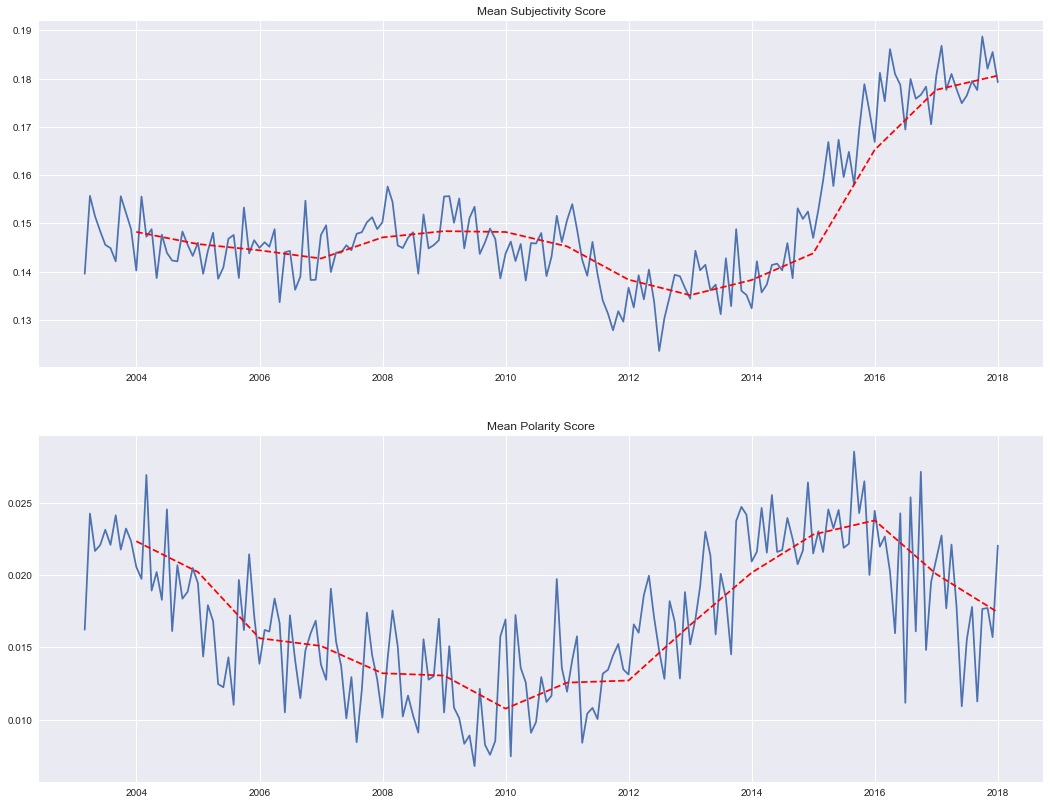

In [19]:
fig, ax = plt.subplots(2, figsize=(18,14))
ax[0].plot(monthly_averages['subjectivity'])
ax[0].plot(yearly_averages['subjectivity'], 'r--')
ax[0].set_title('Mean Subjectivity Score')
ax[1].plot(monthly_averages['polarity'])
ax[1].plot(yearly_averages['polarity'], 'r--')
ax[1].set_title('Mean Polarity Score')

## Filtering for Names

In [20]:
name = " wall street "

In [21]:
headline_name = sentiment_analysed[sentiment_analysed['headline_text'].str.contains(name)]

In [22]:
headline_name.size

585

In [23]:
name_averages = headline_name.resample('D').mean()

In [24]:
name_averages.dropna(inplace=True)

Text(0.5, 1.0, 'Mean Polarity Score for * wall street *')

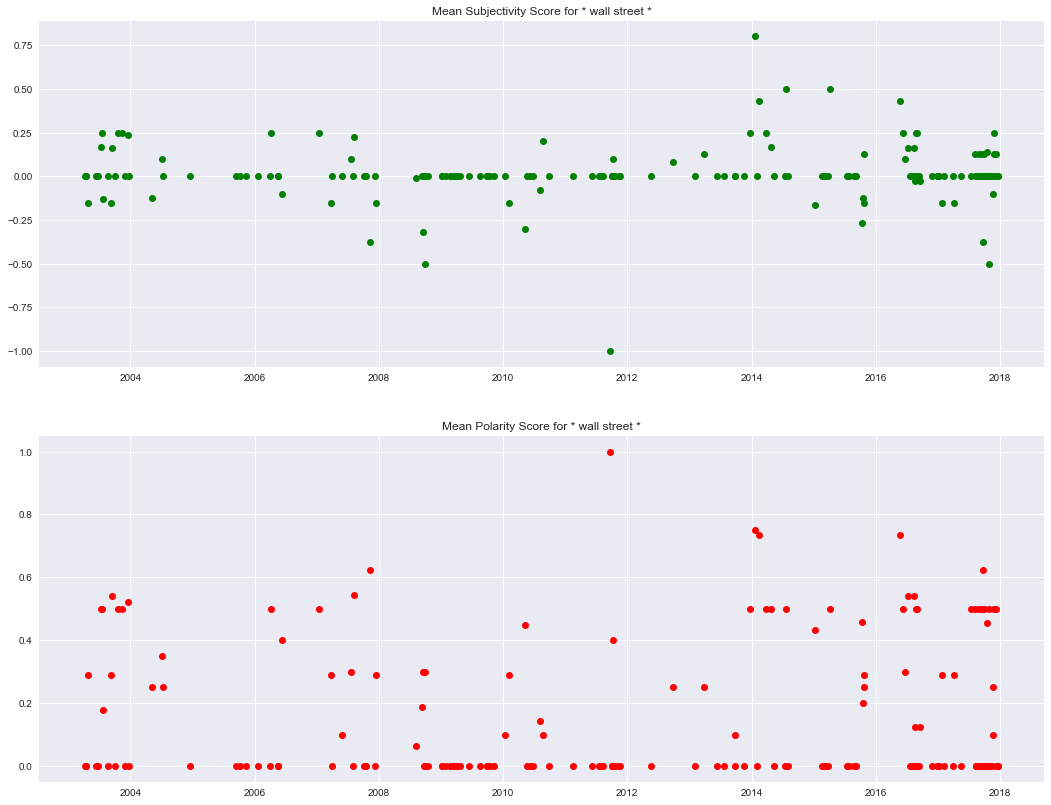

In [25]:
fig, ax = plt.subplots(2, figsize=(18,14))

ax[0].plot(name_averages["polarity"],'o',c='g')
ax[1].plot(name_averages["subjectivity"],'o',c='r')

ax[0].set_title('Mean Subjectivity Score for *' + name + "*")
ax[1].set_title('Mean Polarity Score for *' + name + "*")

In [26]:
def plotName(name,headlines):
    
    df_name = headlines[headlines['headline_text'].str.contains(name)]
    
    name_averages = df_name.resample('D').mean()
    name_averages.dropna(inplace=True)
    
    fig, ax = plt.subplots(2, figsize=(18,14))

    ax[0].set_title('Mean Polarity Score for *' + name + "*")
    ax[1].set_title('Mean Subjectivity Score for *' + name + "*")

    ax[0].plot(name_averages["polarity"],'o',c='g')
    ax[1].plot(name_averages["subjectivity"],'o',c='r')


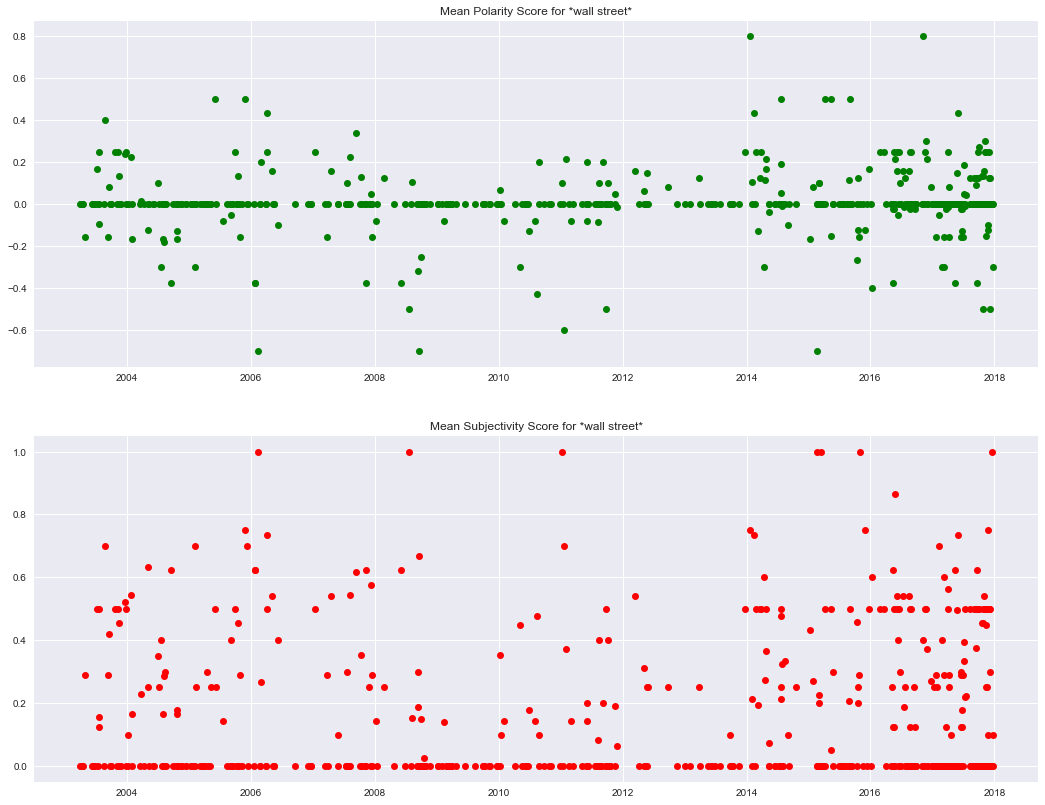

In [27]:
plotName("wall street",sentiment_analysed)

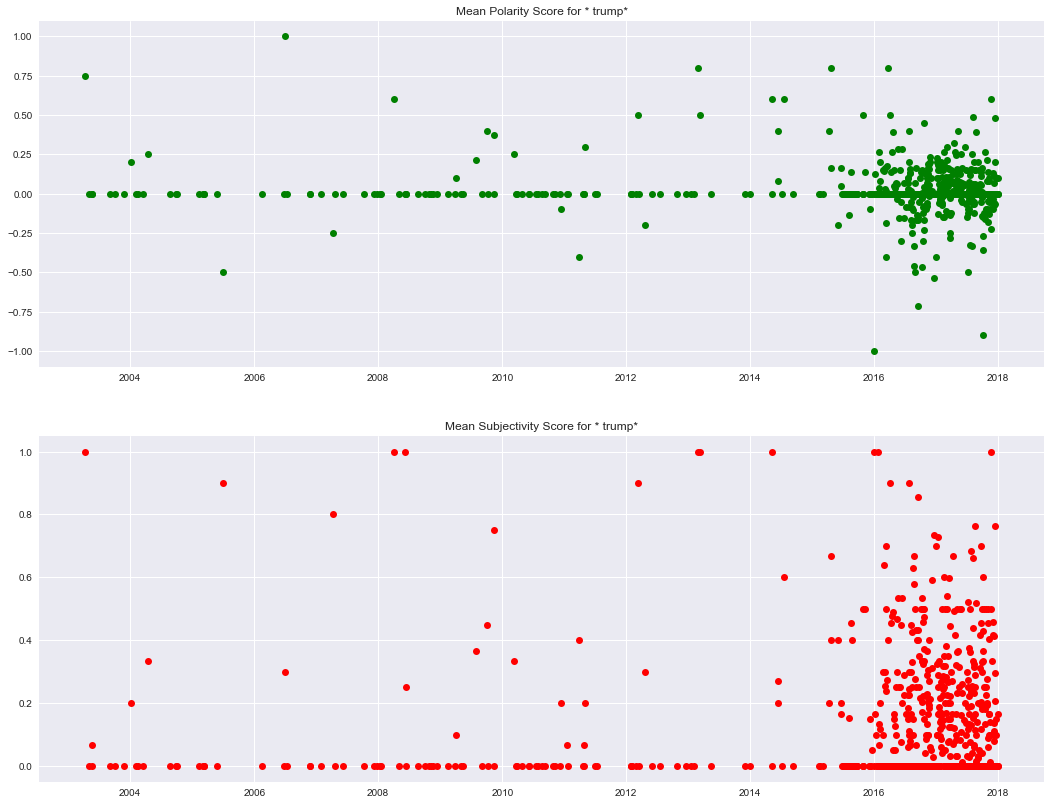

In [28]:
plotName(" trump",sentiment_analysed)